<a href="https://colab.research.google.com/github/AfaqueAliBhutto/Python/blob/master/Lab9_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step
Testing Loss 1.08 Testing Accuracy 0.57


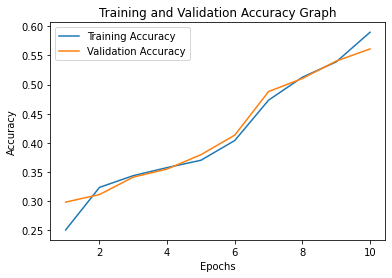

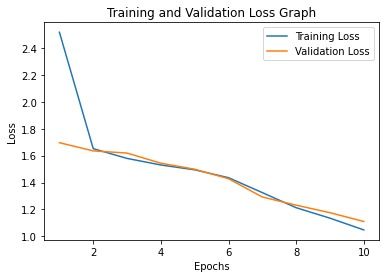

In [1]:
from keras import datasets
from keras import models, layers
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(Xtrain, ytrain), (Xtest, ytest) = datasets.mnist.load_data()

#spliting the dataset for validation 
Xtrain, X_valid, ytrain, y_valid = train_test_split(Xtrain, ytrain, test_size= 0.2)

tf.random.set_seed(2)

#building the Sequential Keras model
mnist_model = models.Sequential()

#Reshaping the data into 2 dimensions to make it one-dimensional vector containing the features
mnist_model.add(layers.Flatten())

#10 nodes in hidden layer with ‘relu’ activation function 
mnist_model.add(layers.Dense(10, activation = 'relu', input_shape = (784,)))

#10 output nodes with "Softmax" activation function 
mnist_model.add(layers.Dense(10, activation = 'softmax'))

#Converting the labels of the data to categorical to make model understand that this iS categorical data
ytrain = to_categorical(ytrain, 10)
y_valid = to_categorical(y_valid, 10)
ytest = to_categorical(ytest, 10)

#Compiling the model
mnist_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics= ['acc'])

#Training the model on the training data
model_history = mnist_model.fit(Xtrain, ytrain, epochs=10,validation_data=(X_valid, y_valid), verbose=0)    
hist_dic = model_history.history

#To store and access the values of loss and accuracy
loss , acc = mnist_model.evaluate(Xtest, ytest, verbose=0)

print("Testing Loss", round(loss, 2), "Testing Accuracy", round(acc, 2))

#Plotting the Accuracy graph per each epoch
epochs = np.arange(len(hist_dic['acc']))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy Graph')
plt.plot(epochs+1, hist_dic['acc'], label = 'Training Accuracy')
plt.plot(epochs+1, hist_dic['val_acc'], label = 'Validation Accuracy')
plt.legend(loc='best')
plt.show()

#Plotting the Loss graph per each epoch
epochs = np.arange(len(hist_dic['loss']))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and Validation Loss Graph')
plt.plot(epochs+1, hist_dic['loss'], label = 'Training Loss')
plt.plot(epochs+1, hist_dic['val_loss'], label = 'Validation Loss')
plt.legend(loc='best')
plt.show()